# 프로젝트 주제: 테러 관련 데이터를 분석, 시각화해보자


##### 참고 사이트 
- https://www.kaggle.com/START-UMD/gtd
- https://www.kaggle.com/ash316/terrorism-around-the-world

---

In [496]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import set_matplotlib_hangul
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')

---

## 0. raw 데이터 정리
    목표 : 1970년~ 2010년대까지 전세계 테러 관련된 데이터를 불러와, 필요한 데이터 
           구분하여 컬럼 정리

In [8]:
# raw 데이터 불러오기
terror=pd.read_csv('../data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
# 컬럼 정리
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


In [12]:
terror.index

RangeIndex(start=0, stop=181691, step=1)

---

## 1. 연도별로 전세계 테러 발생 수 집계하여 시각화
    - 목표
    (1) 연도별로 테러 발생 수 집계
    (2) 시각화 및 특정 구간에 대한 발생 이유 추측 

In [40]:
# 1-(1) 연도별로 pivot_table
terrorCount_world = terror.pivot_table(index='Year', values='Country', aggfunc='count')
terrorCount_world.rename(columns={'Country':'count'}, inplace=True)
terrorCount_world.head()

,count
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


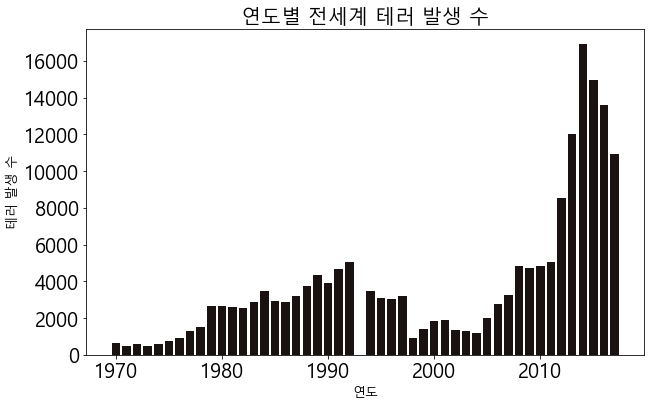

In [41]:
# 1- (2) 시각화_1
plt.figure(figsize=(10, 6))
plt.bar(terrorCount_world.index,terrorCount_world['count'], color = '#1A1111')
plt.title('연도별 전세계 테러 발생 수', size=20)
plt.xlabel('연도', size=13)
plt.ylabel('테러 발생 수', size=13)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

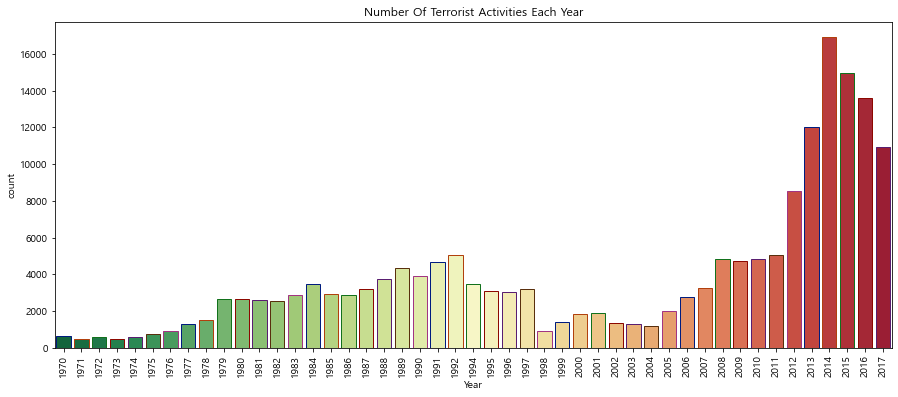

In [75]:
# 1- (2) 시각화_2
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

```
2000~2001년 이후로 테러 발생 수가 가파르게 상승함.
-> 2001년 911테러 사건을 계기로, 극단주의 이슬람 무장단체들의 테러 활동이 증폭된 것으로 추측함. 
```

---

## 2. 테러가 가장 많이 일어난 10개국 시각화
    - 목표
    (1) 테러가 가장 많이 일어난 상위 10개 국가 정렬
    (2) 시각화

In [80]:
# 2 -(1) 상위 10개 국가 정렬
terror_ten = terror.pivot_table(index='Country', values='Year', aggfunc=['count'])
terror_ten.columns = terror_ten.columns.droplevel([1])
terror_ten = terror_ten.sort_values('count', ascending=False)
terror_ten = terror_ten.head(10)
terror_ten

,count
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


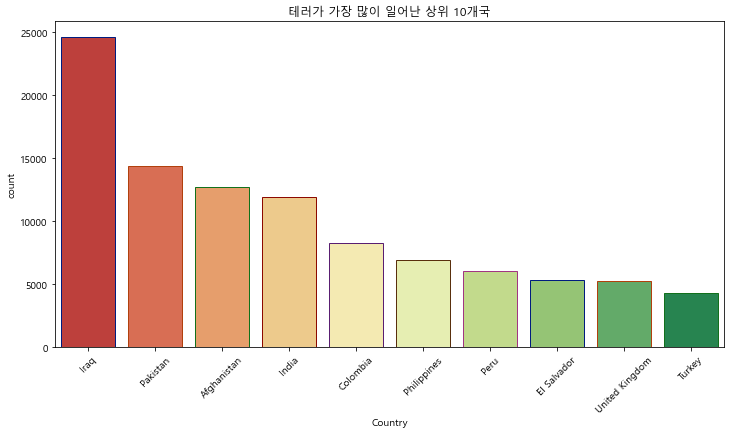

In [74]:
# 2 -(2) 시각화
plt.subplots(figsize=(12,6))
sns.barplot(x='Country', y='count',data=terror_ten,palette='RdYlGn',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('테러가 가장 많이 일어난 상위 10개국')
plt.show()

---

## 3. 문제2 데이터 -> 국가별로 사망자 수, 부상자 수 구분하여 시각화
    - 목표
    (1) 상위 10개 국가 데이터에서 사망자, 부상자 수 추가 
    (2) 테러 발생 수, 사망자, 부상자 수 구분하여 시각화 (특성이 다른 국가가 있다면 시각화 강조 !)

In [127]:
# 3 -(1) 사망자, 부상자 수 추가하여 terror_ten 데이터 정리

terror_ten.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_wound=terror.groupby('Country')['Wounded'].sum().to_frame()
terror_ten['killed'] = coun_kill
terror_ten['wounded'] =coun_wound
terror_ten.reset_index(inplace=True)
terror_ten


,Country,Attacks,killed,wounded
0,Iraq,24636,78589.0,134690.0
1,Pakistan,14368,23822.0,42038.0
2,Afghanistan,12731,39384.0,44277.0
3,India,11960,19341.0,28980.0
4,Colombia,8306,14698.0,10328.0
5,Philippines,6908,9559.0,13367.0
6,Peru,6096,12771.0,4078.0
7,El Salvador,5320,12053.0,5062.0
8,United Kingdom,5235,3410.0,6106.0
9,Turkey,4292,6888.0,9899.0


In [165]:
country_name = terror_ten['Country']
country_name

0              Iraq
1          Pakistan
2       Afghanistan
3             India
4          Colombia
5       Philippines
6              Peru
7       El Salvador
8    United Kingdom
9            Turkey
Name: Country, dtype: object

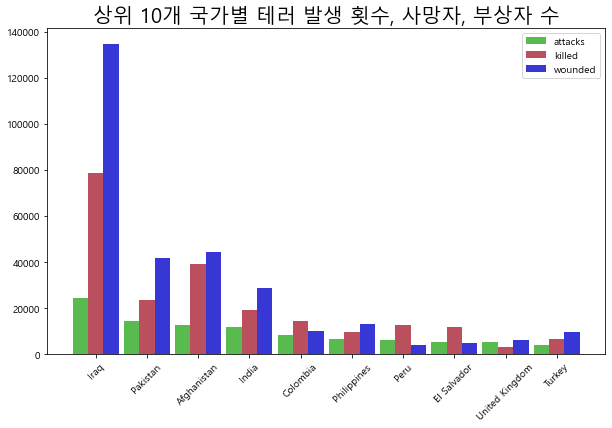

In [176]:
# 3 -(2) 테러 발생 횟수, 사망자 수, 부상자 수 한 그래프에 시각화

x=np.arange(0,10,1)
plt.figure(figsize=(10,6))
plt.bar(x+0.0, terror_ten['Attacks'], color='#59BA4F', width=0.3,label='attacks')
plt.bar(x+0.3, terror_ten['killed'], color='#BA4F5D', width=0.3, label='killed')
plt.bar(x+0.6, terror_ten['wounded'], color='#3737D5', width=0.3, label='wounded')
plt.xticks(x+0.3, (country_name))
plt.xticks(rotation=45)

plt.title('상위 10개 국가별 테러 발생 횟수, 사망자, 부상자 수', size=20)
plt.legend(labels=['attacks','killed','wounded'], loc="upper right")
plt.show()



```
- 테러 발생 횟수 vs 사상자(사망자수+부상자수) 비교
    - 상위 10개국 모두 테러 발생 횟수보다 사상자가 더 많다.

- 테러 발생 횟수 vs 사망자 수 vs 부상자 수 비교
    - 대부분의 국가에서 '테러 발생 횟수 < 사망자 수 <부상자 수' 순의 경향을 보이나,
    - 'Colombia', 'Peru', 'El Salvador' 세 국가는 
       테러 발생 횟수보다 사망자 수가 더 많이 발생하는 경향을 보인다.
    - 'United Kingdom'은 발생 횟수, 부상자 수보다 사망자 수가 제일 적은 경향을 보인다.
```


---

## 4. 대륙별로 구분한 후, 각 대륙별 테러 특성 파악  
    - 목표
    (1) raw 데이터에서 대륙별로 데이터 정리  
    (2) 테러 공격 형태, 사망자 수, 부상자 수 등 대륙별 특성 정리
     

In [202]:
# 4-(1)_1 대륙별로 pivot_table -> 발생 횟수, 사망자 수, 부상자 수 비교
# terrorCopy_kill : ['Region'] / ['Killed', 'Wounded', 'casualities', 'terror_count']

country = ['Middle East & North Africa', 'South Asia', 'South America', 'Western Europe', 'Southeast Asia', 'Eastern Europe', 'North America', 'East Asia']
terrorCopy = terror.copy()
terrorCopy = terrorCopy[terrorCopy['Region'].isin(country)]
terrorCopy_kill = terrorCopy.pivot_table(index='Region',aggfunc=np.sum)
terrorCopy_kill.drop(['Day','Month','Year','latitude','longitude'], axis=1, inplace=True)
terrorCopy_kill

,Killed,Wounded,casualities
Region,,,
East Asia,1152.0,9213.0,10003.0
Eastern Europe,7415.0,12045.0,18239.0
Middle East & North Africa,137642.0,214308.0,329807.0
North America,4916.0,21531.0,26398.0
South America,28849.0,16704.0,43562.0
South Asia,101319.0,141360.0,234366.0
Southeast Asia,15637.0,26259.0,40841.0
Western Europe,6694.0,18332.0,22778.0


In [206]:
terrorCopy_count = terrorCopy.pivot_table(index='Region',aggfunc='count')
terrorCopy_count = terrorCopy_count.loc[:, 'Year'] 
terrorCopy_count

Region
East Asia                       802
Eastern Europe                 5144
Middle East & North Africa    50474
North America                  3456
South America                 18978
South Asia                    44974
Southeast Asia                12485
Western Europe                16639
Name: Year, dtype: int64

In [207]:
terrorCopy_kill['terror_count'] = terrorCopy_count

In [214]:
terrorCopy_kill.sort_values('terror_count', ascending=False, inplace=True)
terrorCopy_kill

,Killed,Wounded,casualities,terror_count
Region,,,,
Middle East & North Africa,137642.0,214308.0,329807.0,50474
South Asia,101319.0,141360.0,234366.0,44974
South America,28849.0,16704.0,43562.0,18978
Western Europe,6694.0,18332.0,22778.0,16639
Southeast Asia,15637.0,26259.0,40841.0,12485
Eastern Europe,7415.0,12045.0,18239.0,5144
North America,4916.0,21531.0,26398.0,3456
East Asia,1152.0,9213.0,10003.0,802


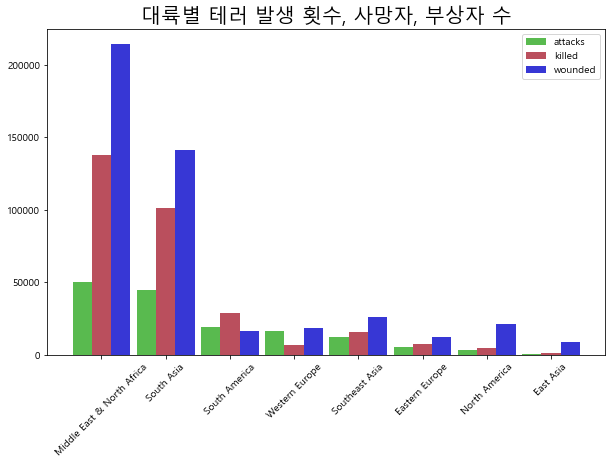

In [216]:
# 4-(1)_2 대륙별 테러발생횟수, 사망자 수, 부상자 수 시각화

x=np.arange(0,8,1)
plt.figure(figsize=(10,6))
plt.bar(x+0.0, terrorCopy_kill['terror_count'], color='#59BA4F', width=0.3,label='attacks')
plt.bar(x+0.3, terrorCopy_kill['Killed'], color='#BA4F5D', width=0.3, label='killed')
plt.bar(x+0.6, terrorCopy_kill['Wounded'], color='#3737D5', width=0.3, label='wounded')
plt.xticks(x+0.3, (country))
plt.xticks(rotation=45)

plt.title('대륙별 테러 발생 횟수, 사망자, 부상자 수', size=20)
plt.legend(labels=['attacks','killed','wounded'], loc="upper right")
plt.show()

```
- 테러 발생 횟수 vs 사망자 수 vs 부상자 수 비교
    - 8개의 대륙(지역) 중, 'Middle East & North Africa'에서 테러가 제일 많이 발생했고, 그 피해(사망자, 부상자 수) 또한 제일 크다.
    - 대부분의 국가에서 '테러 발생 횟수 < 사망자 수 <부상자 수' 순의 경향을 보이나,
    - 'South America' 국가는 
       테러 발생 횟수보다 사망자 수가 더 많이 발생하는 경향을 보인다.
    - 'Western Europe'은 발생 횟수, 부상자 수보다 사망자 수가 제일 적은 경향을 보인다.
```

In [313]:
# 4-(2)_1 대륙별로 pivot_table ->attacksType 비교
terror['AttackType'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [340]:
terrorCopy_type = terrorCopy.pivot_table(index='Region',columns='AttackType',values='Year', aggfunc='count')
terrorCopy_type.rename(columns={
'Armed Assault':'Armed\nAssault',
'Assassination':'Assassination',
'Bombing/Explosion':'Bombing\nExplosion',
'Facility/Infrastructure Attack':'Facility\nInfrastructure\nAttack',
'Hijacking':'Hijacking',
'Hostage Taking (Barricade Incident)':'Barricade\nIncident',
'Hostage Taking (Kidnapping)':'Kidnapping',
'Unarmed Assault':'Unarmed\nAssault',
'Unknown':'Unknown'
}, inplace=True)
terrorCopy_type.reset_index(inplace=True)
terrorCopy_type

AttackType,Region,Armed\nAssault,Assassination,Bombing\nExplosion,Facility\nInfrastructure\nAttack,Hijacking,Barricade\nIncident,Kidnapping,Unarmed\nAssault,Unknown
0,East Asia,117,55,330,200,18,3,14,42,23
1,Eastern Europe,1274,400,2766,260,26,21,220,62,115
2,Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891
3,North America,448,255,1534,906,18,67,123,73,32
4,South America,3875,2745,9039,803,67,234,1414,47,754
5,South Asia,11404,4301,21246,2189,93,120,3277,323,2021
6,Southeast Asia,4022,1369,4818,948,59,67,744,25,433
7,Western Europe,1724,2938,8508,2631,67,89,269,148,265


In [336]:
x1 = terrorCopy_type.loc[terrorCopy_type.index[0], :].sort_values().index
x1
#terrorCopy_type_x = ['Armed\nAssault', 'Assassination', 'Bombing\nExplosion', 'Facility\nInfrastructure\nAttack', 'Hijacking', 'Barricade\nIncident', 'Kidnapping', 'Unarmed\nAssault', 'Unknown']

Index(['Barricade\nIncident', 'Kidnapping', 'Hijacking', 'Unknown',
       'Unarmed\nAssault', 'Assassination', 'Armed\nAssault',
       'Facility\nInfrastructure\nAttack', 'Bombing\nExplosion'],
      dtype='object', name='AttackType')

In [337]:
x = np.arange(0, len(terrorCopy_type.columns))
x1 = terrorCopy_type.loc[terrorCopy_type.index[0], :].sort_values().index
y1 = terrorCopy_type.loc[terrorCopy_type.index[0], :].sort_values()
x2 = terrorCopy_type.loc[terrorCopy_type.index[1], :].sort_values().index
y2 = terrorCopy_type.loc[terrorCopy_type.index[1], :].sort_values()
x3 = terrorCopy_type.loc[terrorCopy_type.index[2], :].sort_values().index
y3 = terrorCopy_type.loc[terrorCopy_type.index[2], :].sort_values()
x4 = terrorCopy_type.loc[terrorCopy_type.index[3], :].sort_values().index
y4 = terrorCopy_type.loc[terrorCopy_type.index[3], :].sort_values()
x5 = terrorCopy_type.loc[terrorCopy_type.index[4], :].sort_values().index
y5 = terrorCopy_type.loc[terrorCopy_type.index[4], :].sort_values()
x6 = terrorCopy_type.loc[terrorCopy_type.index[5], :].sort_values().index
y6 = terrorCopy_type.loc[terrorCopy_type.index[5], :].sort_values()
x7 = terrorCopy_type.loc[terrorCopy_type.index[6], :].sort_values().index
y7 = terrorCopy_type.loc[terrorCopy_type.index[6], :].sort_values()
x8 = terrorCopy_type.loc[terrorCopy_type.index[7], :].sort_values().index
y8 = terrorCopy_type.loc[terrorCopy_type.index[7], :].sort_values()

In [328]:
y1 = terrorCopy_type.loc[terrorCopy_type.index[0], :].sort_values()
y1

AttackType
Hostage Taking (Barricade Incident)      3
Hostage Taking (Kidnapping)             14
Hijacking                               18
Unknown                                 23
Unarmed Assault                         42
Assassination                           55
Armed Assault                          117
Facility/Infrastructure Attack         200
Bombing/Explosion                      330
Name: East Asia, dtype: int64

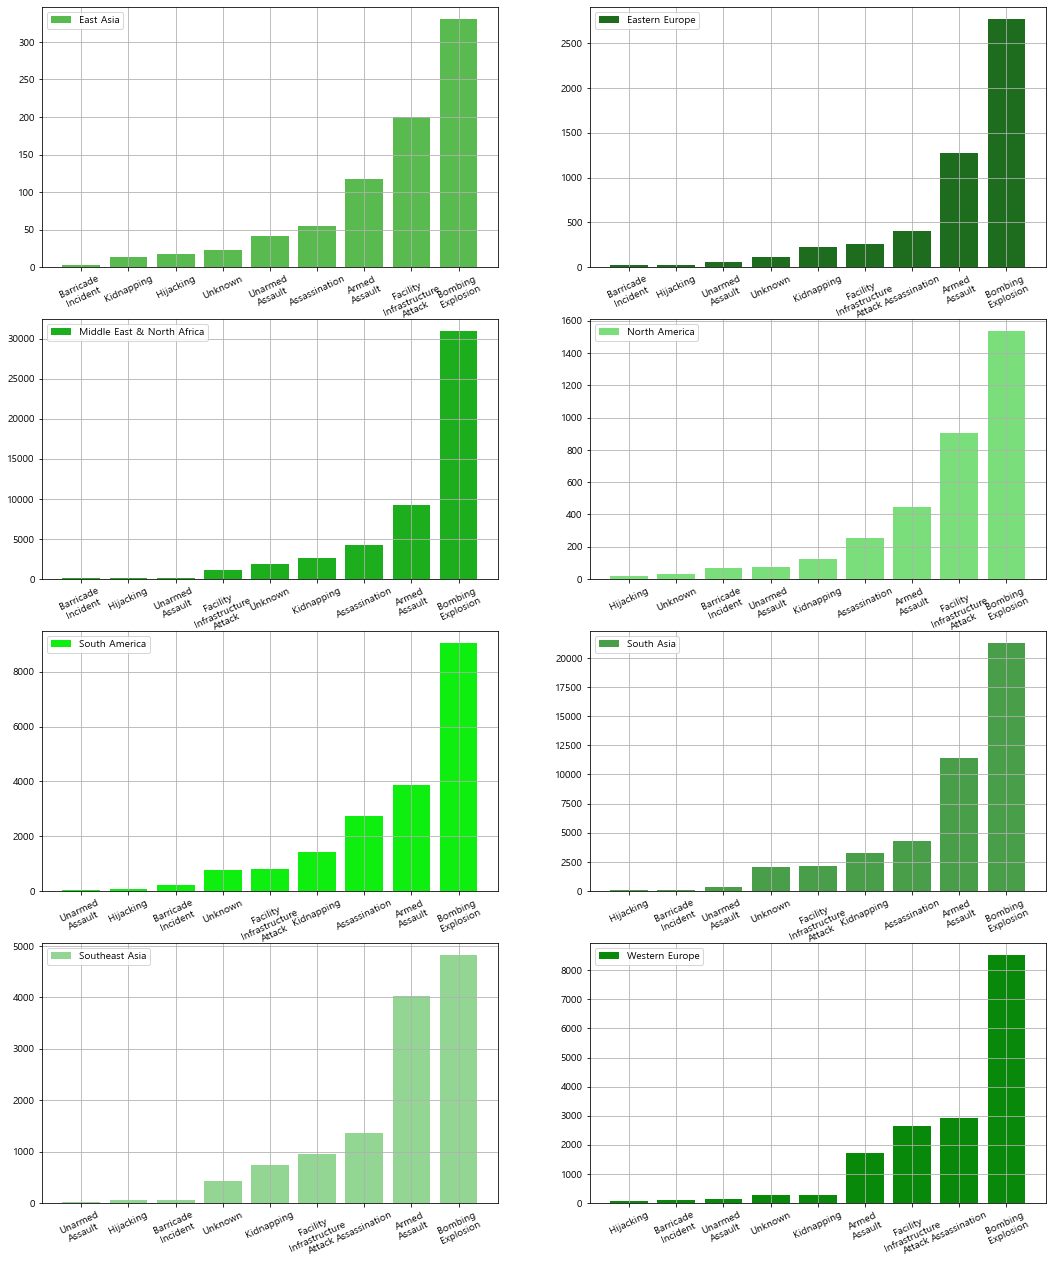

In [338]:
# 4-(2)_2 대륙별로 attacksType 종류 시각화
plt.figure(figsize=(18,22))

plt.subplot(421)
plt.bar(x, y1,label='East Asia', color='#59BA4F')
plt.grid()
plt.legend()
plt.xticks(x, (x1))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(422)
plt.bar(x, y2,label='Eastern Europe', color='#1E6C1E')
plt.grid()
plt.legend()
plt.xticks(x, (x2))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(423)
plt.bar(x, y3,label='Middle East & North Africa', color='#1CAE1C')
plt.grid()
plt.legend()
plt.xticks(x, (x3))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(424)
plt.bar(x, y4,label='North America', color='#7ADE7A')
plt.grid()
plt.legend()
plt.xticks(x, (x4))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(425)
plt.bar(x, y5,label='South America', color='#0FEF0F')
plt.grid()
plt.legend()
plt.xticks(x, (x5))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(426)
plt.bar(x, y6,label='South Asia', color='#499F49')
plt.grid()
plt.legend()
plt.xticks(x, (x6))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(427)
plt.bar(x, y7,label='Southeast Asia', color='#93D593')
plt.grid()
plt.legend()
plt.xticks(x, (x7))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(428)
plt.bar(x, y8,label='Western Europe', color='#098909')
plt.grid()
plt.legend()
plt.xticks(x, (x8))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.show()



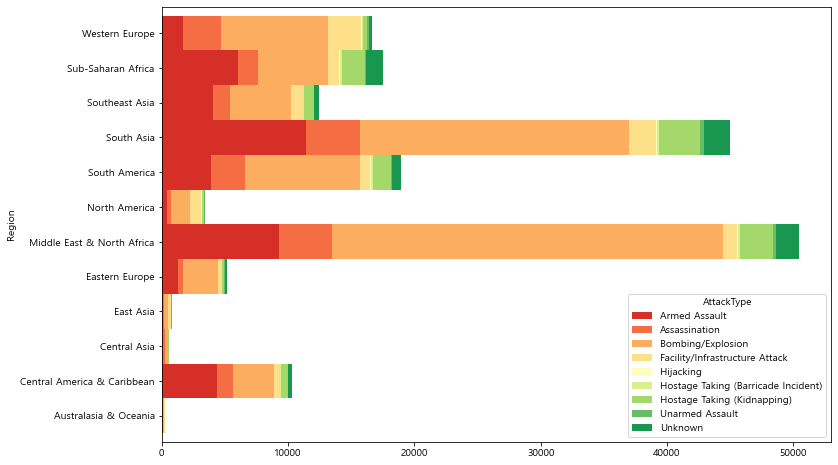

In [343]:
# 4-(2)_3 대륙별 attacksType 누적 시각화
pd.crosstab(terror.Region,terror.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette('RdYlGn',9))
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

```
- 모든 대륙에서 제일 많이 차지하는 attacksType은 'Bombing/Explosion'이다.
- 대부분의 대륙에서 top3를 보면,
    'Bombing/Explosion', 'Assassination', 'Armed Assault'으로, 
    목표물(빌딩, 사람 등)을 삼고, 무장하여 의도적으로 일으킨 테러들이 대부분임을 알 수 있다.
```


---

## 5. 대륙별 2000년 이전, 이후의 테러 발생 횟수 시각화 
    - 목표
    (1) 대륙별 데이터에서 2000년을 기준으로 2000년 이전, 이후 데이터 정리  
    (2) 테러 공격 형태, 사망자 수, 부상자 수 를 대륙별 특정 시기 기준으로 시각화

In [389]:
# 5-(1)_1 2000년(포함) 이후 pivot_table -> 발생 횟수, 사망자 수, 부상자 수 비교
# terror_After : ['Region'] / ['a_Killed', 'a_Wounded', 'a_terror_count']

terror_After = terrorCopy[terrorCopy['Year'] >= 2000]
terror_After = terror_After.pivot_table(index='Region',aggfunc=np.sum)
terror_After.drop(['Day','Month','Year','latitude','longitude','casualities'], axis=1, inplace=True)
terror_After['a_terror_count'] = terror_After_count
terror_After

,Killed,Wounded,a_terror_count
Region,,,
East Asia,859.0,1272.0,198
Eastern Europe,5886.0,9822.0,4013
Middle East & North Africa,117375.0,186720.0,41078
North America,3502.0,18613.0,648
South America,3159.0,4830.0,2508
South Asia,74722.0,107389.0,37212
Southeast Asia,8197.0,17642.0,9562
Western Europe,996.0,5892.0,3200


In [387]:
terror_After_count = terrorCopy[terrorCopy['Year'] >= 2000]
terror_After_count = terror_After_count.pivot_table(index='Region', values='Month', aggfunc='count')
terror_After_count.rename(columns={'Month':'a_terror_count'}, inplace=True)
terror_After_count

,a_terror_count
Region,
East Asia,198
Eastern Europe,4013
Middle East & North Africa,41078
North America,648
South America,2508
South Asia,37212
Southeast Asia,9562
Western Europe,3200


In [391]:
terror_After.rename(columns={
'Killed':'a_Killed',
'Wounded':'a_Wounded',
'a_terror_count':'a_terror_count'
}, inplace=True)
terror_After

,a_Killed,a_Wounded,a_terror_count
Region,,,
East Asia,859.0,1272.0,198
Eastern Europe,5886.0,9822.0,4013
Middle East & North Africa,117375.0,186720.0,41078
North America,3502.0,18613.0,648
South America,3159.0,4830.0,2508
South Asia,74722.0,107389.0,37212
Southeast Asia,8197.0,17642.0,9562
Western Europe,996.0,5892.0,3200


In [394]:
# 2000년(포함) 이전 pivot_table -> 발생 횟수, 사망자 수, 부상자 수 비교
# terror_After : ['Region'] / ['a_Killed', 'a_Wounded', 'a_terror_count']

terror_Before = terrorCopy[terrorCopy['Year'] < 2000]
terror_Before = terror_Before.pivot_table(index='Region',aggfunc=np.sum)
terror_Before.drop(['Day','Month','Year','latitude','longitude','casualities'], axis=1, inplace=True)
terror_Before['b_terror_count'] = terror_Before_count
terror_Before

,Killed,Wounded,b_terror_count
Region,,,
East Asia,293.0,7941.0,604
Eastern Europe,1529.0,2223.0,1131
Middle East & North Africa,20267.0,27588.0,9396
North America,1414.0,2918.0,2808
South America,25690.0,11874.0,16470
South Asia,26597.0,33971.0,7762
Southeast Asia,7440.0,8617.0,2923
Western Europe,5698.0,12440.0,13439


In [393]:
terror_Before_count = terrorCopy[terrorCopy['Year'] < 2000]
terror_Before_count = terror_Before_count.pivot_table(index='Region', values='Month', aggfunc='count')
terror_Before_count.rename(columns={'Month':'b_terror_count'}, inplace=True)
terror_Before_count

,b_terror_count
Region,
East Asia,604
Eastern Europe,1131
Middle East & North Africa,9396
North America,2808
South America,16470
South Asia,7762
Southeast Asia,2923
Western Europe,13439


In [395]:
terror_Before.rename(columns={
'Killed':'b_Killed',
'Wounded':'b_Wounded',
'b_terror_count':'b_terror_count'
}, inplace=True)
terror_Before

,b_Killed,b_Wounded,b_terror_count
Region,,,
East Asia,293.0,7941.0,604
Eastern Europe,1529.0,2223.0,1131
Middle East & North Africa,20267.0,27588.0,9396
North America,1414.0,2918.0,2808
South America,25690.0,11874.0,16470
South Asia,26597.0,33971.0,7762
Southeast Asia,7440.0,8617.0,2923
Western Europe,5698.0,12440.0,13439


In [400]:
# 2000년 이전, 이후 df 합치기
terror_year = pd.concat([terror_Before, terror_After], axis=1)
terror_year

,b_Killed,b_Wounded,b_terror_count,a_Killed,a_Wounded,a_terror_count
Region,,,,,,
East Asia,293.0,7941.0,604,859.0,1272.0,198
Eastern Europe,1529.0,2223.0,1131,5886.0,9822.0,4013
Middle East & North Africa,20267.0,27588.0,9396,117375.0,186720.0,41078
North America,1414.0,2918.0,2808,3502.0,18613.0,648
South America,25690.0,11874.0,16470,3159.0,4830.0,2508
South Asia,26597.0,33971.0,7762,74722.0,107389.0,37212
Southeast Asia,7440.0,8617.0,2923,8197.0,17642.0,9562
Western Europe,5698.0,12440.0,13439,996.0,5892.0,3200


In [401]:
terror_year_sort = terror_year.sort_values('a_terror_count')
terror_year_sort

,b_Killed,b_Wounded,b_terror_count,a_Killed,a_Wounded,a_terror_count
Region,,,,,,
East Asia,293.0,7941.0,604,859.0,1272.0,198
North America,1414.0,2918.0,2808,3502.0,18613.0,648
South America,25690.0,11874.0,16470,3159.0,4830.0,2508
Western Europe,5698.0,12440.0,13439,996.0,5892.0,3200
Eastern Europe,1529.0,2223.0,1131,5886.0,9822.0,4013
Southeast Asia,7440.0,8617.0,2923,8197.0,17642.0,9562
South Asia,26597.0,33971.0,7762,74722.0,107389.0,37212
Middle East & North Africa,20267.0,27588.0,9396,117375.0,186720.0,41078


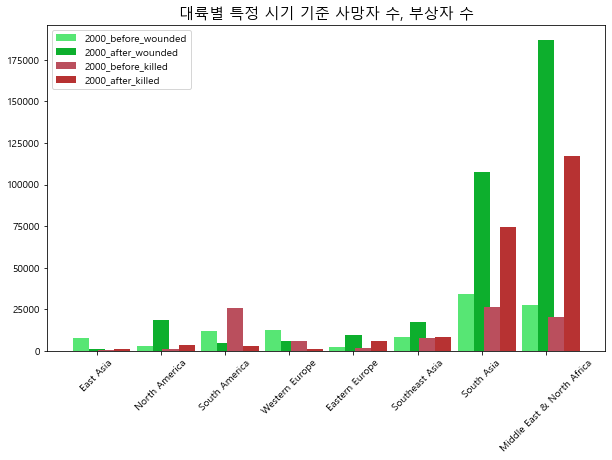

In [424]:
# 5-(1)_2 대륙별 특정 시기 기준 사망자 수, 부상자 수 시각화

x=np.arange(0,8,1)
plt.figure(figsize=(10,6))
plt.bar(x+0.0, terror_year_sort['b_Wounded'], color='#57E674', width=0.25,label='2000_before_wounded')
plt.bar(x+0.25, terror_year_sort['a_Wounded'], color='#0DAF2D', width=0.25,label='2000_after_wounded')
plt.bar(x+0.4, terror_year_sort['b_Killed'], color='#BA4F5D', width=0.25,label='2000_before_killed')
plt.bar(x+0.65, terror_year_sort['a_Killed'], color='#B73232', width=0.25,label='2000_after_killed')
plt.xticks(x+0.25, (terror_year_sort.index))
plt.xticks(rotation=45)

plt.title('대륙별 특정 시기 기준 사망자 수, 부상자 수', size=15)
plt.legend(labels=['2000_before_wounded','2000_after_wounded','2000_before_killed','2000_after_killed'], loc="upper left")
plt.show()

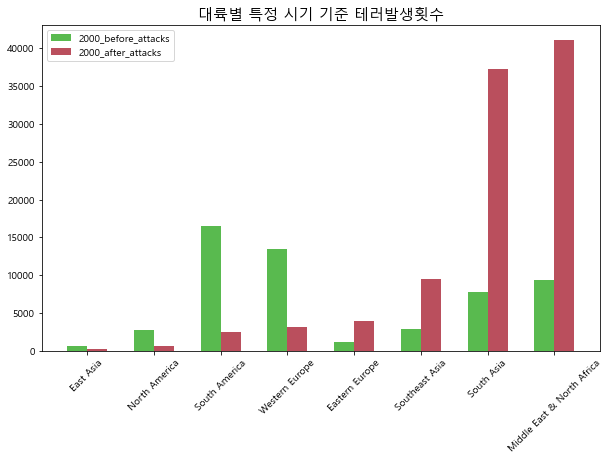

In [413]:
# 5-(1)_2 대륙별 특정 시기 기준 테러발생횟수, 사망자 수, 부상자 수 시각화

x=np.arange(0,8,1)
plt.figure(figsize=(10,6))
plt.bar(x+0.0, terror_year_sort['b_terror_count'], color='#59BA4F', width=0.3,label='2000_before_attacks')
plt.bar(x+0.3, terror_year_sort['a_terror_count'], color='#BA4F5D', width=0.3,label='2000_after_attacks')
plt.xticks(x+0.15, (terror_year_sort.index))
plt.xticks(rotation=45)

plt.title('대륙별 특정 시기 기준 테러발생횟수, 사망자 수, 부상자 수', size=)
plt.legend(labels=['2000_before_attacks','2000_after_attacks'], loc="upper left")
plt.show()

```
- 2000년 이전보다 2000년 이후 테러 발생이 증가한 나라는 
  'Eastern Europe', 'Southeast Asia', 'South Asia', 'Middle East & North Africa' 총 4 대륙이다.
- 또한, 위 4 대륙에서 사망자, 부상자 수도 2000년 이후로 증가했다. 
-  'South America'는 2000년 이후 압도적으로 테러 발생 횟수가 줄었다.
```

In [428]:
# 5-(2)_1 대륙별 특정 기준(2000년 이후)로 pivot_table ->attacksType 비교
terror_After = terrorCopy[terrorCopy['Year'] >= 2000]
terror_After = terror_After.pivot_table(index='Region',columns='AttackType',values='Year', aggfunc='count')
terror_After.rename(columns={
'Armed Assault':'Armed\nAssault',
'Assassination':'Assassination',
'Bombing/Explosion':'Bombing\nExplosion',
'Facility/Infrastructure Attack':'Facility\nInfrastructure\nAttack',
'Hijacking':'Hijacking',
'Hostage Taking (Barricade Incident)':'Barricade\nIncident',
'Hostage Taking (Kidnapping)':'Kidnapping',
'Unarmed Assault':'Unarmed\nAssault',
'Unknown':'Unknown'
}, inplace=True)
terror_After



AttackType,Armed\nAssault,Assassination,Bombing\nExplosion,Facility\nInfrastructure\nAttack,Hijacking,Barricade\nIncident,Kidnapping,Unarmed\nAssault,Unknown
Region,,,,,,,,,
East Asia,48,4,100,19,5,1,2,17,2
Eastern Europe,1055,236,2189,212,4,16,160,51,90
Middle East & North Africa,7095,2167,26935,705,70,70,2323,105,1608
North America,137,36,143,264,6,6,17,38,1
South America,428,163,1249,205,13,10,347,7,86
South Asia,9076,2470,18796,1887,52,113,2989,221,1608
Southeast Asia,3283,845,3854,804,43,44,486,17,186
Western Europe,395,69,1690,906,18,15,14,81,12


In [429]:
x = np.arange(0, len(terror_After.columns))
x1 = terror_After.loc[terror_After.index[0], :].sort_values().index
y1 = terror_After.loc[terror_After.index[0], :].sort_values()
x2 = terror_After.loc[terror_After.index[1], :].sort_values().index
y2 = terror_After.loc[terror_After.index[1], :].sort_values()
x3 = terror_After.loc[terror_After.index[2], :].sort_values().index
y3 = terror_After.loc[terror_After.index[2], :].sort_values()
x4 = terror_After.loc[terror_After.index[3], :].sort_values().index
y4 = terror_After.loc[terror_After.index[3], :].sort_values()
x5 = terror_After.loc[terror_After.index[4], :].sort_values().index
y5 = terror_After.loc[terror_After.index[4], :].sort_values()
x6 = terror_After.loc[terror_After.index[5], :].sort_values().index
y6 = terror_After.loc[terror_After.index[5], :].sort_values()
x7 = terror_After.loc[terror_After.index[6], :].sort_values().index
y7 = terror_After.loc[terror_After.index[6], :].sort_values()
x8 = terror_After.loc[terror_After.index[7], :].sort_values().index
y8 = terror_After.loc[terror_After.index[7], :].sort_values()

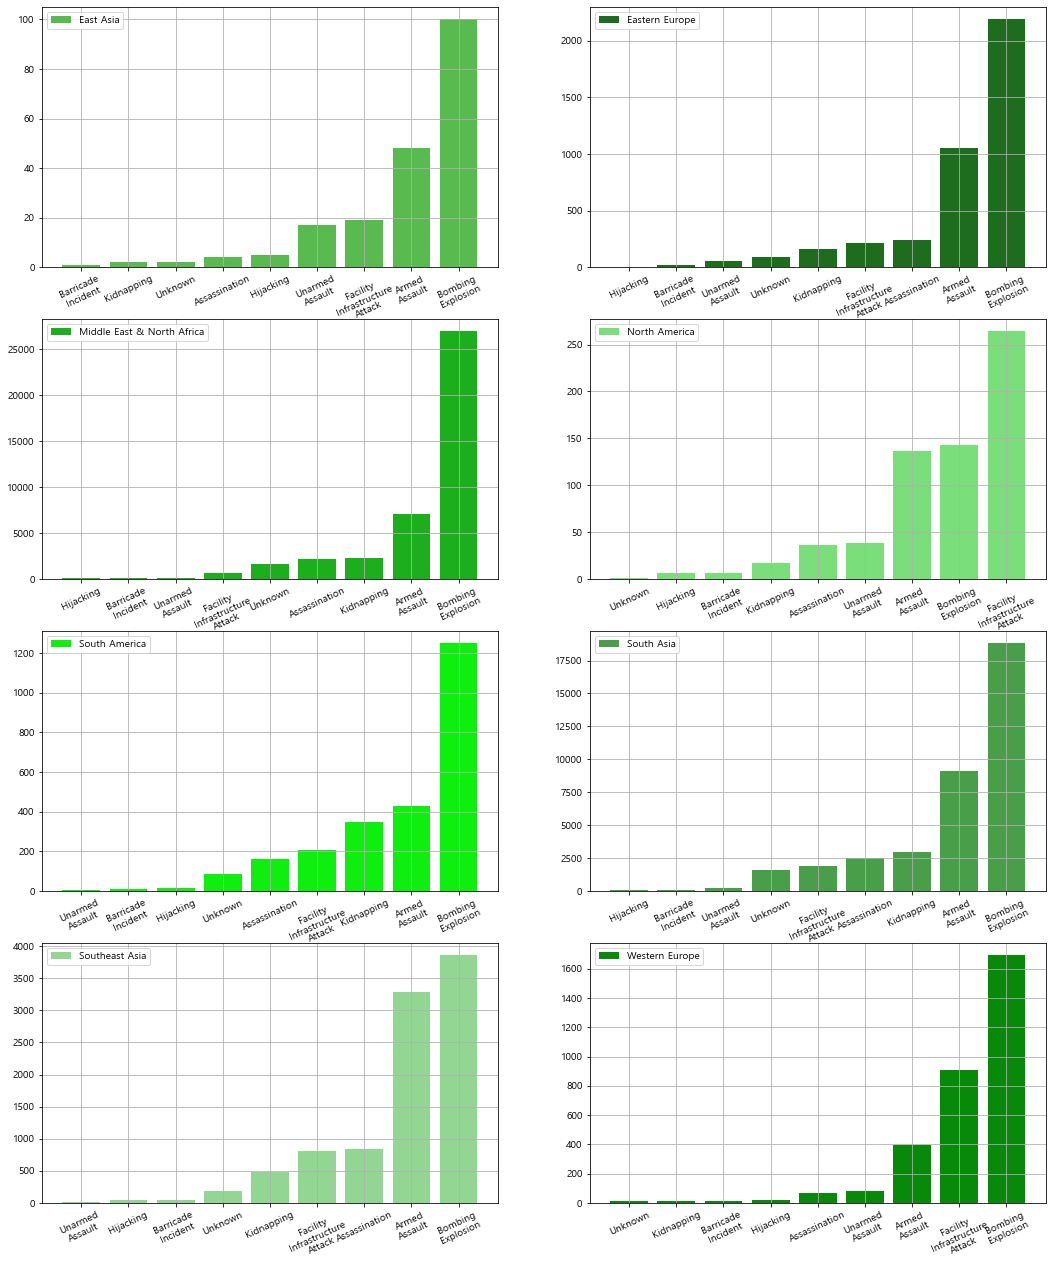

In [430]:
# 5-(2)_2 대륙별로 2000년 이후 attacksType 종류 시각화
plt.figure(figsize=(18,22))

plt.subplot(421)
plt.bar(x, y1,label='East Asia', color='#59BA4F')
plt.grid()
plt.legend()
plt.xticks(x, (x1))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(422)
plt.bar(x, y2,label='Eastern Europe', color='#1E6C1E')
plt.grid()
plt.legend()
plt.xticks(x, (x2))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(423)
plt.bar(x, y3,label='Middle East & North Africa', color='#1CAE1C')
plt.grid()
plt.legend()
plt.xticks(x, (x3))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(424)
plt.bar(x, y4,label='North America', color='#7ADE7A')
plt.grid()
plt.legend()
plt.xticks(x, (x4))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(425)
plt.bar(x, y5,label='South America', color='#0FEF0F')
plt.grid()
plt.legend()
plt.xticks(x, (x5))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(426)
plt.bar(x, y6,label='South Asia', color='#499F49')
plt.grid()
plt.legend()
plt.xticks(x, (x6))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(427)
plt.bar(x, y7,label='Southeast Asia', color='#93D593')
plt.grid()
plt.legend()
plt.xticks(x, (x7))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(428)
plt.bar(x, y8,label='Western Europe', color='#098909')
plt.grid()
plt.legend()
plt.xticks(x, (x8))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.show()

```
- '2000년 이후' 데이터를 기준으로, 'North America'를 제외한 나머지 대륙에서 제일 많이 차지하는 attacksType은 'Bombing/Explosion'이다.
-> 이는 전체 년도 데이터와 비슷한 경향을 보인다.
```

In [431]:
# 5-(2)_1 대륙별 특정 기준(2000년 이전)로 pivot_table ->attacksType 비교
terror_Before = terrorCopy[terrorCopy['Year'] < 2000]
terror_Before = terror_Before.pivot_table(index='Region',columns='AttackType',values='Year', aggfunc='count')
terror_Before.rename(columns={
'Armed Assault':'Armed\nAssault',
'Assassination':'Assassination',
'Bombing/Explosion':'Bombing\nExplosion',
'Facility/Infrastructure Attack':'Facility\nInfrastructure\nAttack',
'Hijacking':'Hijacking',
'Hostage Taking (Barricade Incident)':'Barricade\nIncident',
'Hostage Taking (Kidnapping)':'Kidnapping',
'Unarmed Assault':'Unarmed\nAssault',
'Unknown':'Unknown'
}, inplace=True)
terror_Before


AttackType,Armed\nAssault,Assassination,Bombing\nExplosion,Facility\nInfrastructure\nAttack,Hijacking,Barricade\nIncident,Kidnapping,Unarmed\nAssault,Unknown
Region,,,,,,,,,
East Asia,69,51,230,181,13,2,12,25,21
Eastern Europe,219,164,577,48,22,5,60,11,25
Middle East & North Africa,2178,2039,3973,410,68,30,343,72,283
North America,311,219,1391,642,12,61,106,35,31
South America,3447,2582,7790,598,54,224,1067,40,668
South Asia,2328,1831,2450,302,41,7,288,102,413
Southeast Asia,739,524,964,144,16,23,258,8,247
Western Europe,1329,2869,6818,1725,49,74,255,67,253


In [432]:
x = np.arange(0, len(terror_Before.columns))
x1 = terror_Before.loc[terror_Before.index[0], :].sort_values().index
y1 = terror_Before.loc[terror_Before.index[0], :].sort_values()
x2 = terror_Before.loc[terror_Before.index[1], :].sort_values().index
y2 = terror_Before.loc[terror_Before.index[1], :].sort_values()
x3 = terror_Before.loc[terror_Before.index[2], :].sort_values().index
y3 = terror_Before.loc[terror_Before.index[2], :].sort_values()
x4 = terror_Before.loc[terror_Before.index[3], :].sort_values().index
y4 = terror_Before.loc[terror_Before.index[3], :].sort_values()
x5 = terror_Before.loc[terror_Before.index[4], :].sort_values().index
y5 = terror_Before.loc[terror_Before.index[4], :].sort_values()
x6 = terror_Before.loc[terror_Before.index[5], :].sort_values().index
y6 = terror_Before.loc[terror_Before.index[5], :].sort_values()
x7 = terror_Before.loc[terror_Before.index[6], :].sort_values().index
y7 = terror_Before.loc[terror_Before.index[6], :].sort_values()
x8 = terror_Before.loc[terror_Before.index[7], :].sort_values().index
y8 = terror_Before.loc[terror_Before.index[7], :].sort_values()

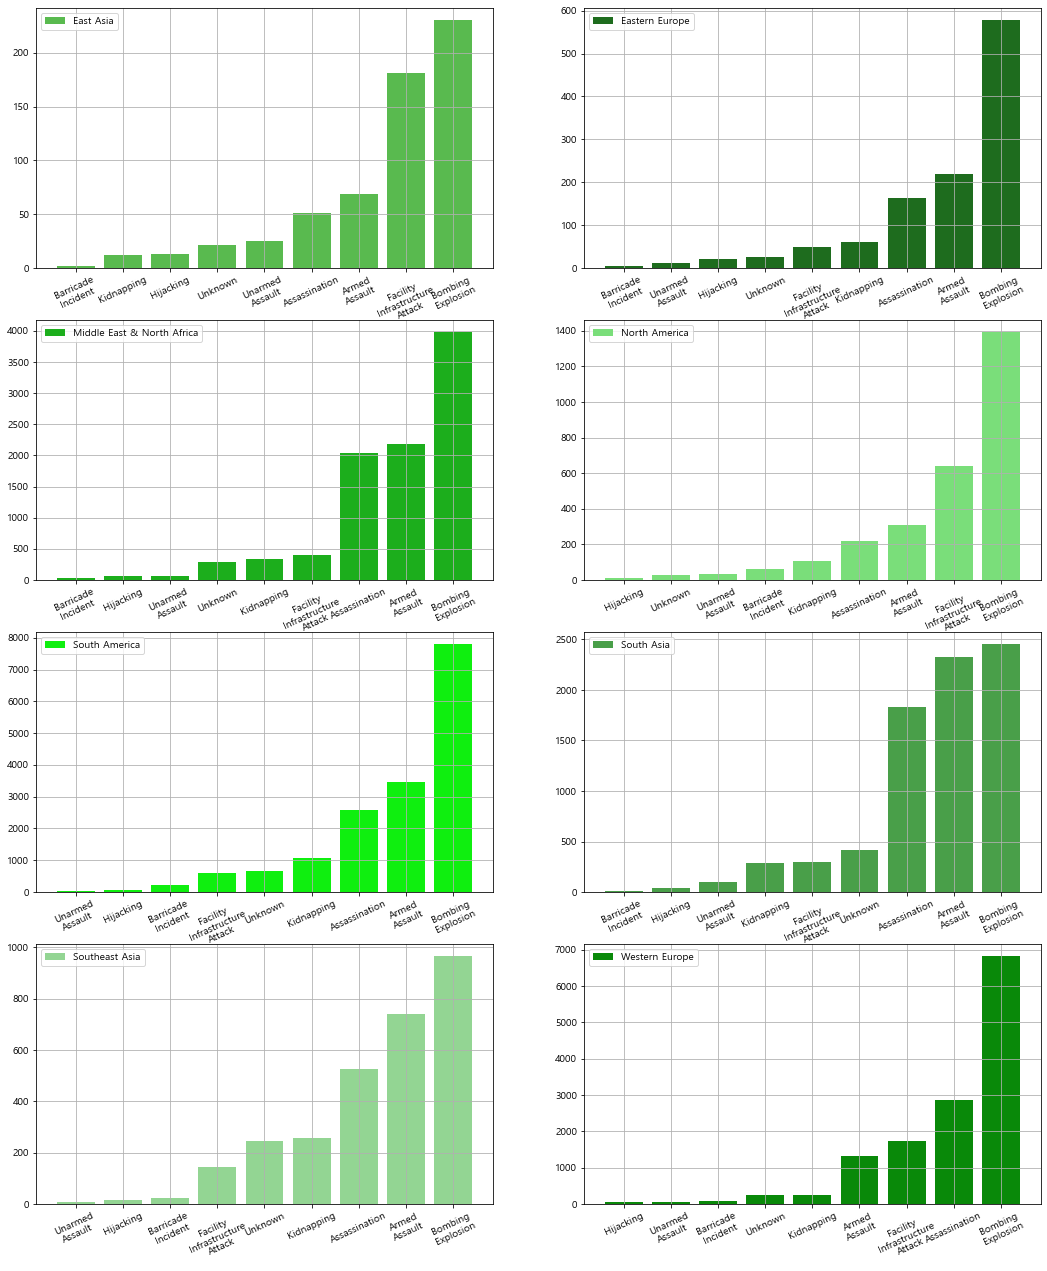

In [433]:
# 5-(2)_2 대륙별로 2000년 이전 attacksType 종류 시각화
plt.figure(figsize=(18,22))

plt.subplot(421)
plt.bar(x, y1,label='East Asia', color='#59BA4F')
plt.grid()
plt.legend()
plt.xticks(x, (x1))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(422)
plt.bar(x, y2,label='Eastern Europe', color='#1E6C1E')
plt.grid()
plt.legend()
plt.xticks(x, (x2))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(423)
plt.bar(x, y3,label='Middle East & North Africa', color='#1CAE1C')
plt.grid()
plt.legend()
plt.xticks(x, (x3))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(424)
plt.bar(x, y4,label='North America', color='#7ADE7A')
plt.grid()
plt.legend()
plt.xticks(x, (x4))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(425)
plt.bar(x, y5,label='South America', color='#0FEF0F')
plt.grid()
plt.legend()
plt.xticks(x, (x5))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(426)
plt.bar(x, y6,label='South Asia', color='#499F49')
plt.grid()
plt.legend()
plt.xticks(x, (x6))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(427)
plt.bar(x, y7,label='Southeast Asia', color='#93D593')
plt.grid()
plt.legend()
plt.xticks(x, (x7))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.subplot(428)
plt.bar(x, y8,label='Western Europe', color='#098909')
plt.grid()
plt.legend()
plt.xticks(x, (x8))
plt.xticks(rotation=25)
plt.xticks(size=10)

plt.show()

```
- '2000년 이전' 데이터를 기준으로, 모든 대륙에서 제일 많이 차지하는 attacksType은 'Bombing/Explosion'이다.
-> 이는 전체 년도 데이터와 비슷한 경향을 보인다.
```

---

## 6. 대륙별 + 연도별 테러 발생 횟수 시각화 
    - 목표
    (1) 대륙별 데이터 전체 연도별 데이터 정리
    (2) 테러 공격 형태, 사망자 수, 부상자 수의 대륙별 10년단위 특정 시기 기준을 grid로 시각화

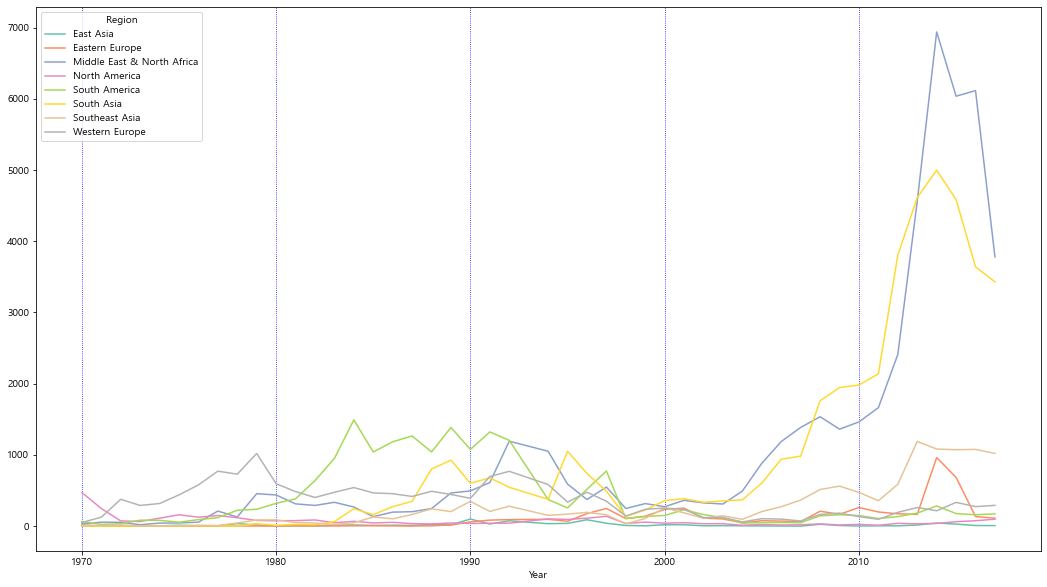

In [454]:
# 6 -(1) 전체 연도 나타내고, 10년단위로 grid 찍어 시각화
terror_region=pd.crosstab(terrorCopy.Year,terrorCopy.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,10)
plt.grid(axis='x',linestyle='dotted', color='b')
plt.show()

```
- 년도별 테러 발생 횟수가 가장 많은 대륙
    - '1970~1980년대' : 'Western Europe'
    - '1980~1990년대' : 'South America'
    - '1990~2000년대' : 'Middle East & North Africa'
    - '2000~2010년대' : 'South Asia'
    - '2010년대 이후' : 'Middle East & North Africa'

- 'Western Europe'은 '1970~1980년대'에 피크를 찍다가, 점점 작아지는 경향을 보이고,
  'Middle East & North Africa', 'South Asia', 'Southeast Asia' 순으로 점점 증가하는 경향을 보인다.
  - 세 대륙 모두 2000년을 기준으로 급증한다.
- 'South America'는 '1980~1990년대'에 피크를 찍다가, 점점 작아지는 경향을 보인다.
- 특이사항으로, 2014년~2015년도에 'Eastern Europe'이 급증하는 것을 볼 수 있다.
    - 시리아 내전의 여파와 유럽의 난민 사태, 이슬람 무장 테러 단체인 IS출현으로 유럽의 이슬람 테러리즘 활동이 증가하여 영향을 미친 것으로 파악된다.
- 'Middle East & North Africa'은 대부분 이슬람이 국교인 국가로, 이슬람 종교를
   중심으로 끊임없는 종교내전이 발생하고 있다.
   이로 인해, 이슬람 국가가 대부분인 'Middle East & North Africa'의 테러 발생 횟수
   또한 계속 증가하고 있는 추세이다.
```


---

## 7. 우리나라 테러 발생 특성 시각화 
    - 목표
    (1) raw 데이터에서 우리나라 테러 관련 데이터 추출
    (2) 테러 공격 형태, 사망자 수, 부상자 수, 피해자 특성 시각화

In [463]:
# 7 -(1) 우리나라 데이터만 가져오기
terror_korea = terror[terror['Country'].isin(['South Korea'])]
terror_korea.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
2514,1974,8,15,South Korea,East Asia,Seoul,37.566535,126.977969,Assassination,1.0,0.0,"wife, Pres. Chung Hu Park",NaN,Korean Youth League,Government (General),Firearms,NaN,1.0
15734,1982,3,18,South Korea,East Asia,Busan,35.179554,129.075642,Facility/Infrastructure Attack,1.0,3.0,US Government Information Office,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,4.0
19820,1983,9,22,South Korea,East Asia,Daegu,35.871435,128.601445,Bombing/Explosion,1.0,4.0,US Cultural Center (housed in a 5 story building),NaN,Unknown,Government (Diplomatic),Explosives,NaN,5.0
29151,1986,9,14,South Korea,East Asia,Gimpo International Airport,37.558947,126.798341,Bombing/Explosion,5.0,19.0,Kimpo International Airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,24.0
29696,1986,12,15,South Korea,East Asia,Busan,35.179554,129.075642,Armed Assault,0.0,11.0,US Information Svce Bldg,NaN,Student Radicals,Government (General),Melee,NaN,11.0


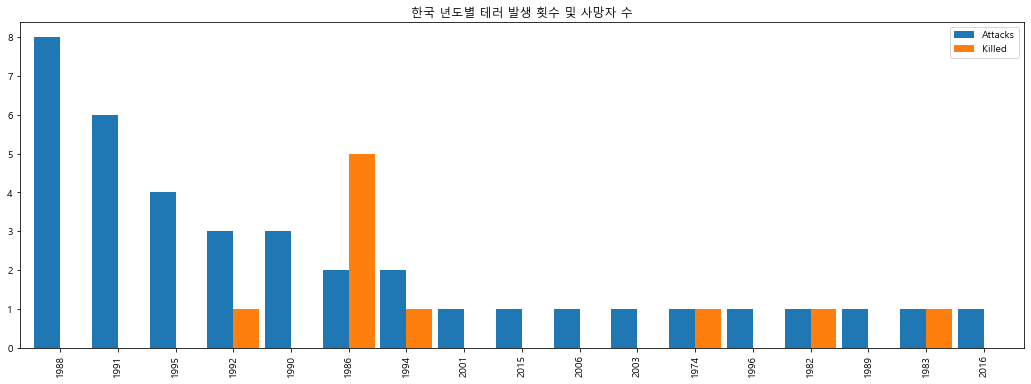

In [477]:
# 7 -(2)_1 한국 년도별 테러 발생 횟수 및 사망자 수
coun_terror=terror_korea['Year'].value_counts().to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror_korea.groupby('Year')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.title('한국 년도별 테러 발생 횟수 및 사망자 수')
plt.show()

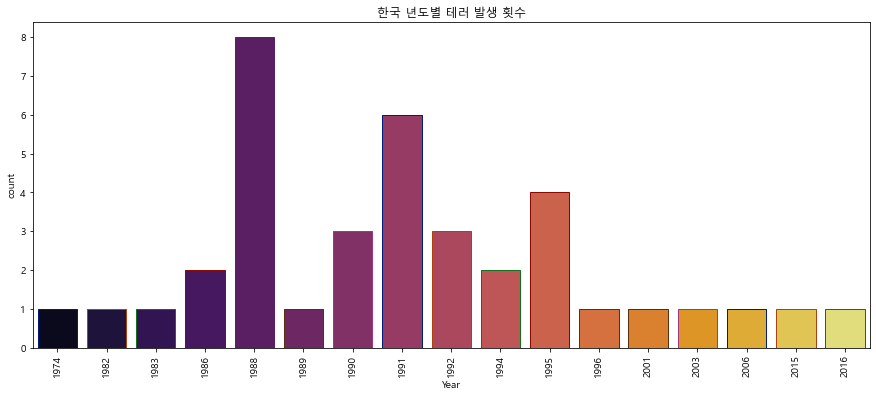

In [467]:
# 7 -(2)_1 한국 년도별 테러 발생 횟수
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror_korea,palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('한국 년도별 테러 발생 횟수')
plt.show()

```
- 한국의 테러 발생 횟수 top3 : 1988년, 1991년, 1995년
    - 1988년도에는 88올림픽이 열리던 시기로, 국제적인 관심을 받던 시기. 
    - 북한과의 외교적인 마찰이 극심한 정권 시기와 맞물려,
    - '대한항공 858편 폭파 사건' 등 북한의 소행으로 추정되는 테러 발생 건수가 많은 것으로 추측한다.
- 가장 많은 사상자를 낸 년도 : 1986년
    - 김포국제공항 폭탄 테러 사건으로, 
    - 서울 아시안 게임 개막을 5일 앞두고 발생하여 아시안 게임을 방해하려는 북한의 테러로 추측한다.
- 가장 최근에 발생한 테러 년도 : 2016년
    - 북한이 개성공단 폐쇄를 선언한 해.
    - 북한이 백령도에 해안포 발사.
    - 북한의 4차 핵실험 사건.
```


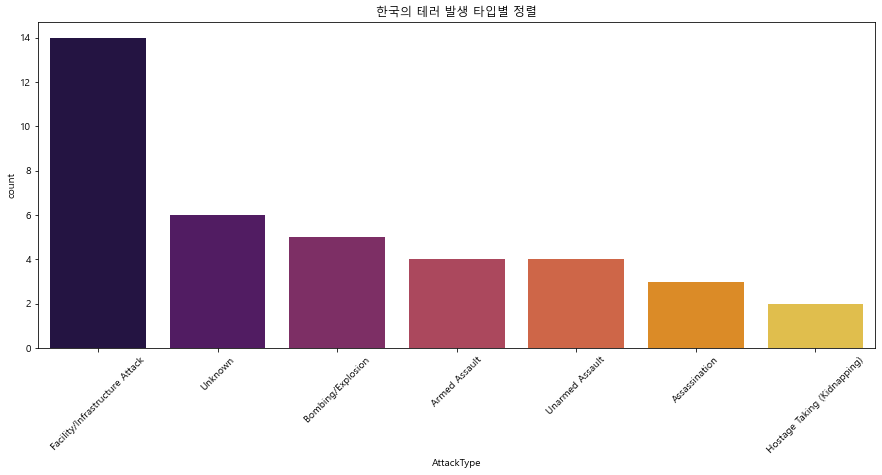

In [471]:
# 7 -(2)_2 한국의 테러 발생 타입 정렬 
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror_korea,palette='inferno',order=terror_korea['AttackType'].value_counts().index)
plt.xticks(rotation=45)
plt.title('한국의 테러 발생 타입별 정렬')
plt.show()

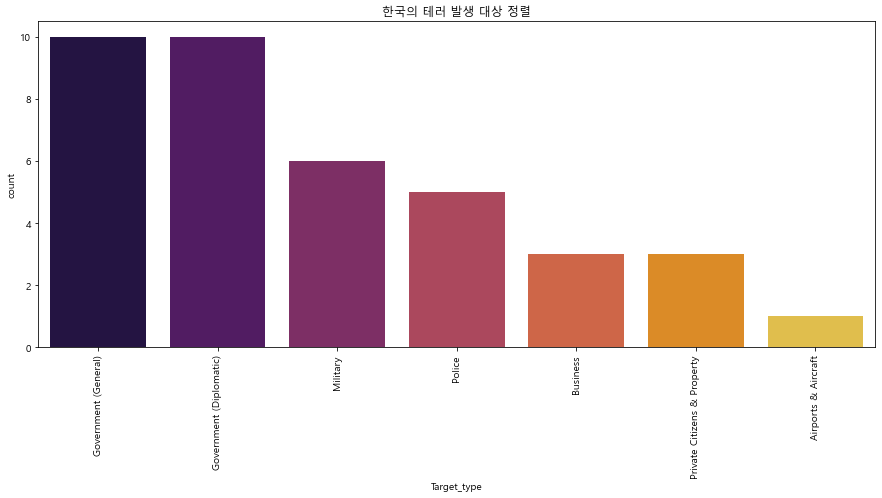

In [474]:
# 7 -(2)_2 한국의 테러 발생 대상 정렬
plt.subplots(figsize=(15,6))
sns.countplot(terror_korea['Target_type'],palette='inferno',order=terror_korea['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('한국의 테러 발생 대상 정렬')
plt.show()

```
- 가장 많은 테러 타입은 'Facility/Infrastructure Attack'으로, 특정 시설 공격이 제일 많다.
- 가장 많이 공격 당한 대상은 'Government'이다.
-> 특정 시설, 즉 정부기관과 관련된 시설(외교 시설,일반 정부 기관)을 대상으로 한 테러가 제일 많은 것을 알 수 있다.
```

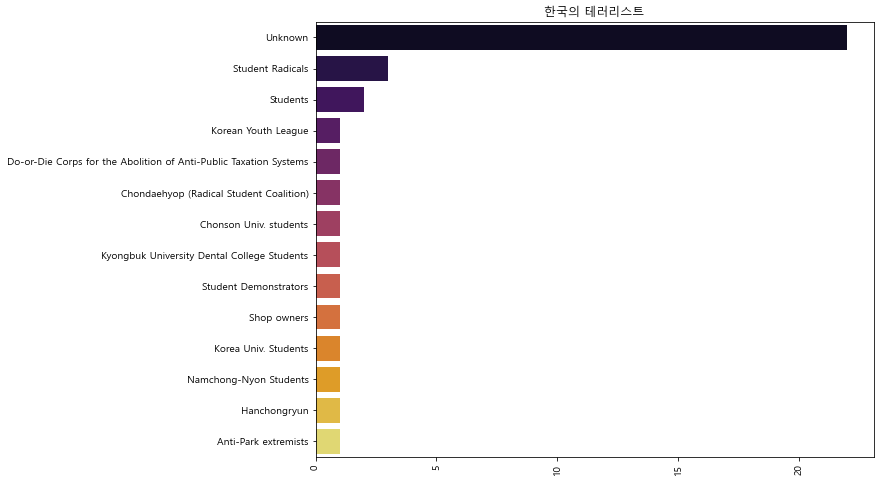

In [479]:
# 7 -(3) 한국 테러리스트 그룹 정렬
sns.barplot(terror_korea['Group'].value_counts().values,terror_korea['Group'].value_counts().index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('한국의 테러리스트')
plt.show()

```
- 'Unknown'이 제일 많은 것으로 보아, 테러를 일으킨 단체나 개인의 소행을 정확히 찾지 못한 경우가 대부분이다.
    - 북한의 소행으로 추측하는 테러 사건들이 많음을 의미.
- 'Unknown' 다음으로 주목해야 할 것은 'Students'이다.
    - 북한의 소행으로 추측되는 테러 사건 이외에, 정확한 테러리스트가 밝혀진 경우는 대부분 학생들이다.
    - 우리나라에서는 학생들의 정신적인 불안 증세가 다른 나이 세대에 비해 극심하다고 볼 수 있다.
```

---

## 8. 테러가 사회에 미치는 부정적인 영향 시각화 
    - 목표
    (1) 전세계 기준 테러리스트, 테러 발생 대상 데이터 정렬하고 시각화
  

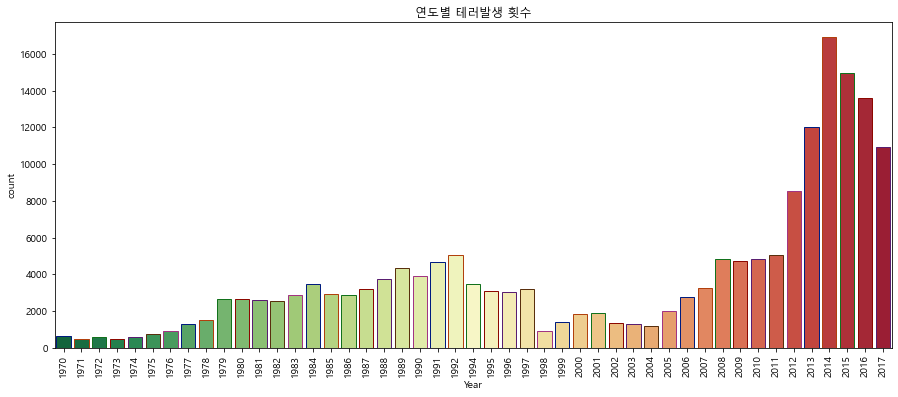

In [495]:
# 8. 연도별 테러발생 횟수 
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('연도별 테러발생 횟수')
plt.show()

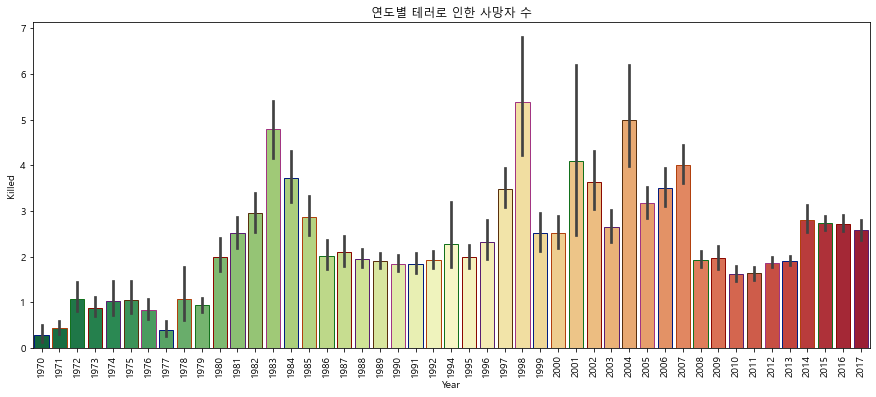

In [493]:
# 8. 연도별 테러로 인한 사망자 수
plt.subplots(figsize=(15,6))
sns.barplot('Year','Killed',data=terror,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('연도별 테러로 인한 사망자 수')
plt.show()

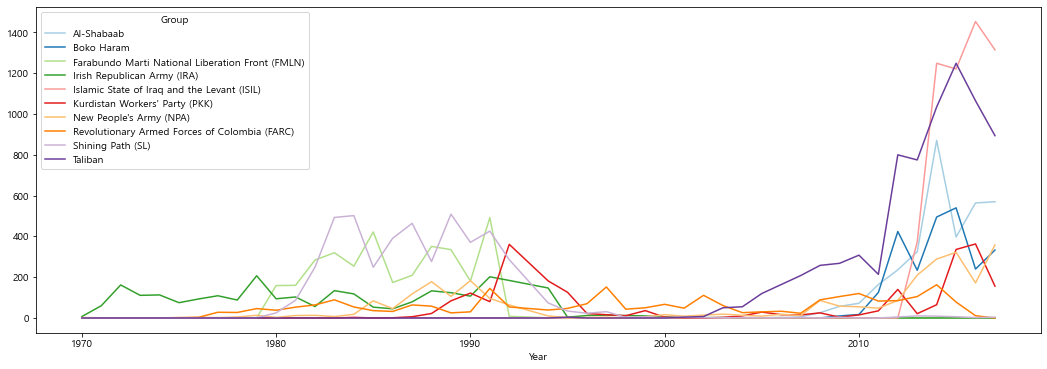

In [485]:
# 8. 전세계 테러리스트 정렬
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

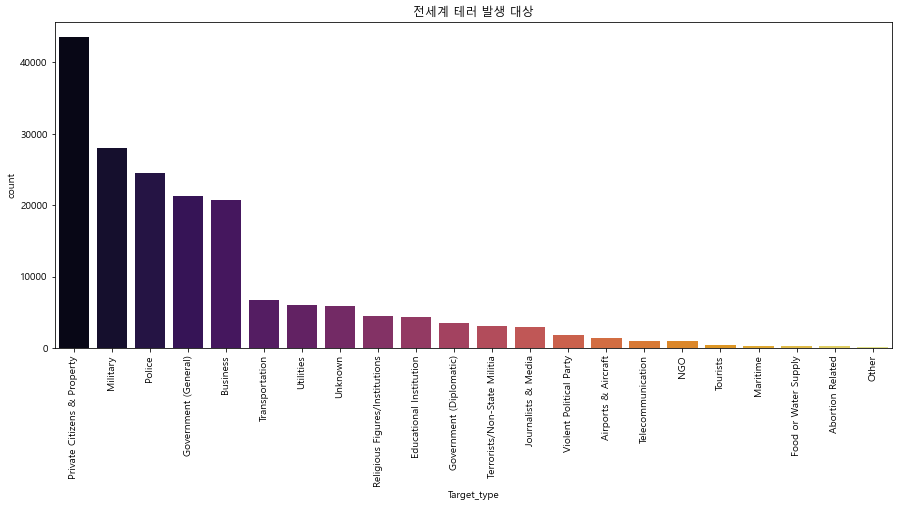

In [487]:
# 8. 전세계 테러 발생 대상 정렬
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('전세계 테러 발생 대상')
plt.show()

```
- 전세계를 기준으로, 
  테러를 일으킨 타입 기준 'Bombing/Explosion', 'Assassination', 'Armed Assault' 완전 무장한 형태의 테러로, 사상자 수가 많이 발생할 확률이 높다.
  테러를 일으키는 단체들은 대부분 '종교, 특정 이념'과 관련되어 있고,
  테러로 인해 가장 많은 피해를 입은 대상자는 '시민'과 '군인', '경찰' 등 일반 시민들이다.

  -> 테러를 일으키는 원인이 '종교가 달라서' '이념이 달라서', 사건과 무관한 '일반 시민들'이 많은 피해를 입고, 심지어는 사망에 이르고 있다.
     개인적인 사상의 불만으로 뭉친 테러 단체들은 완전 무장으로 공격을 하며,
     우리의 일상 공간을 대상으로 테러를 가하고 있다.    
     이로 인해, 전세계 시민들은 언제, 어디서 테러가 일어날지 모르는 불안감에 시달리고 있으며,
     테러로 인해 발생한 난민들의 대륙별 유입으로, 다시 그 지역에서 테러가 일어나는 등 악순환이 지속되고 있다.
```
    

---

김영선, 본인은 이번 문제와 문제의 답을 외부로 유출하지 않겠습니다.